In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('spam.csv')

In [3]:
data.tail(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

1. DATA CLEANING
2. EDA
3. TEXT PREPROCESSING
4. MODEL BUILDING
5. EVALUATION
6. IMPROVEMENT
7. WEBSITE

## Exploratory Data Analysis

### 1. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True) #droping last 3 columns

In [7]:
data.shape

(5572, 2)

In [8]:
data.sample(2)

,v1,v2
3028,ham,What is your record for one night? :)
209,ham,Both :) i shoot big loads so get ready!


In [9]:
data.rename(columns={'v1':'Target','v2':'Mail-Text'},inplace=True)

In [10]:
data.sample(2)

,Target,Mail-Text
4093,ham,how are you? I miss you!
2876,ham,twenty past five he said will this train have ...


In [11]:
# Encoding data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
data['Target'] = encoder.fit_transform(data['Target'])

In [13]:
data.tail(2)

,Target,Mail-Text
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [14]:
# check for missing values
data.isna().sum()

Target       0
Mail-Text    0
dtype: int64

In [15]:
# check for duplicate values
data.duplicated().sum()

409

In [16]:
# drop duplicate values
data = data.drop_duplicates(keep = 'first')

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(5163, 2)

In [19]:
data.sample(4)

,Target,Mail-Text
2971,0,Sary just need Tim in the bollox &it hurt him ...
1692,0,Weightloss! No more girl friends. Make loads o...
719,0,Macha dont feel upset.i can assume your mindse...
4853,0,"Also north carolina and texas atm, you would j..."


### 2. Data Visualization

In [20]:
data['Target'].value_counts()

0    4516
1     647
Name: Target, dtype: int64

In [21]:
data.rename(columns={'Target':'Type'},inplace=True)

In [22]:
data['Type'].value_counts()

0    4516
1     647
Name: Type, dtype: int64

In [23]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


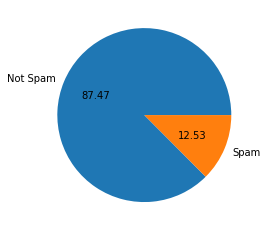

In [24]:
# pie chart
import matplotlib.pyplot as plt
plt.pie(data['Type'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

## Data is not in balanced format

In [25]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data['num_characters']=data['Mail-Text'].apply(len) # number of characters in a mail

In [29]:
data.rename(columns={'num_characters':'Character Count'},inplace=True)

In [30]:
data.head(3)

,Type,Mail-Text,Character Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [31]:
data['Mail-Text'].apply(lambda x:nltk.word_tokenize(x)) ## Breaking sentence into number of words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Mail-Text, Length: 5163, dtype: object

In [32]:
data['Mail-Text'].apply(lambda x:len(nltk.word_tokenize(x))) ## Counting number of words used in a Mail

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Mail-Text, Length: 5163, dtype: int64

In [33]:
data['Word Count'] = data['Mail-Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
data.head(4)

,Type,Mail-Text,Character Count,Word Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [35]:
data['Sentence Count']=data['Mail-Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
data.tail(4)

,Type,Mail-Text,Character Count,Word Count,Sentence Count
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


In [37]:
data.describe()

,Type,Character Count,Word Count,Sentence Count
count,5163.000000,5163.000000,5163.000000,5163.000000
mean,0.125315,78.811156,18.441604,1.945574
std,0.331108,58.153491,13.327973,1.361713
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [38]:
# Describe function for Not Spam Messages

data[data['Type'] == 0][['Character Count','Word Count','Sentence Count']].describe()

,Character Count,Word Count,Sentence Count
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.120903,1.799601
std,56.356310,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [39]:
# Describe function for Spam Messages

data[data['Type'] == 1][['Character Count','Word Count','Sentence Count']].describe()

,Character Count,Word Count,Sentence Count
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.964451
std,30.096861,7.038065,1.484795
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [40]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
 import seaborn as sns

<AxesSubplot:xlabel='Character Count', ylabel='Count'>

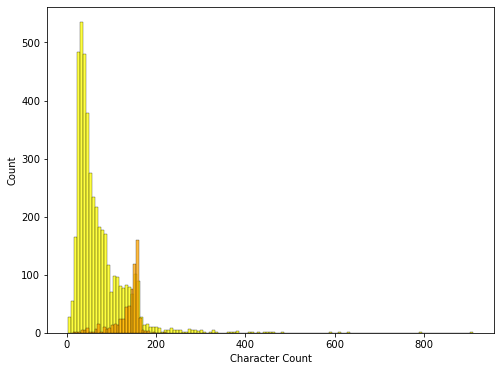

In [42]:
## Histogram plot
plt.figure(figsize=(8,6))
sns.histplot(data[data['Type']==0]['Character Count'],color = 'yellow')
sns.histplot(data[data['Type']==1]['Character Count'],color = 'orange')

<AxesSubplot:xlabel='Word Count', ylabel='Count'>

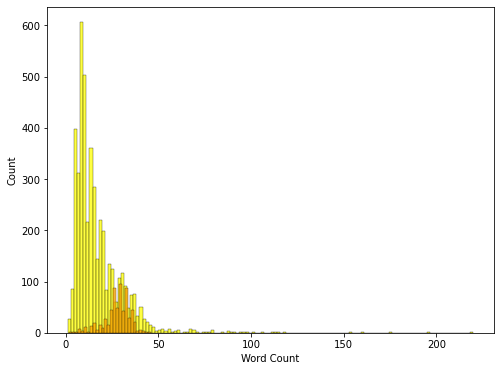

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['Type']==0]['Word Count'],color = 'yellow')
sns.histplot(data[data['Type']==1]['Word Count'],color = 'orange')

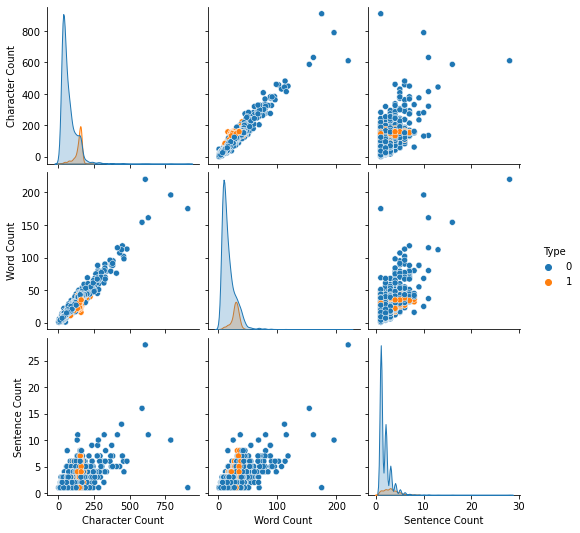

In [44]:
sns.pairplot(data,hue='Type')

In [45]:
columns_to_select = ['Type', 'Character Count', 'Word Count', 'Sentence Count'] # Select only numeric columns
numeric_data = data[columns_to_select]

<AxesSubplot:>

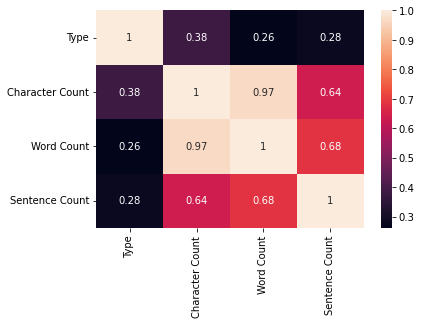

In [46]:
## Heat map plot
sns.heatmap(numeric_data.corr(),annot=True)

## 3. Text Preprosessing
1. Lower Case Convertion
2. Tokenization
3. Removing special Characters
4. Removing stopwords and punctuation
5. Stemmimg

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Roaming')

'roam'

In [51]:
def transform_text(text):
    text = text.lower() # 1. Lower Case Convertion
    text = nltk.word_tokenize(text) # 2. Tokenization
    
    y=[] # 3. Removing special Characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # 4. Removing stop words and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # 5. Stemmimg
        y.append(ps.stem(i))
        
    return " ".join(y)

In [52]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [53]:
data['Mail-Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [54]:
data['Transformed-Text']=data['Mail-Text'].apply(transform_text)

In [55]:
data.head(4)

,Type,Mail-Text,Character Count,Word Count,Sentence Count,Transformed-Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


#### Word Cloud Formation:

In [56]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=800,min_font_size=10,background_color='white')

In [58]:
spam_wc = wc.generate(data[data['Type']==1]['Transformed-Text'].str.cat(sep=" "))

ValueError: Only supported for TrueType fonts

In [59]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

NameError: name 'spam_wc' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
non_spam_wc = wc.generate(data[data['Type']==0]['Transformed-Text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(12,5))
plt.imshow(non_spam_wc)

In [ ]:
spam_word = []
for msg in data[data['Type']==1]['Transformed-Text'].tolist():
    for word in msg.split():
        spam_word.append(word)

In [ ]:
len(spam_word)

In [ ]:
from collections import Counter
Counter(spam_word)

In [ ]:
pd.DataFrame(Counter(spam_word).most_common(30))

In [ ]:
data_frame = pd.DataFrame(Counter(spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
non_spam_word = []
for msg in data[data['Type']==0]['Transformed-Text'].tolist():
    for word in msg.split():
        non_spam_word.append(word)

In [ ]:
len(non_spam_word)

In [ ]:
data_frame = pd.DataFrame(Counter(non_spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING

In [ ]:
data.head()

### Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
A = cv.fit_transform(data['Transformed-Text']).toarray()

In [ ]:
A.shape

In [ ]:
b = data['Type'].values

In [ ]:
b

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(A_train,b_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(b_test,b_pred1))
print(confusion_matrix(b_test,b_pred1))
print(precision_score(b_test,b_pred1))

In [ ]:
mnb.fit(A_train,b_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(b_test,b_pred2))
print(confusion_matrix(b_test,b_pred2))
print(precision_score(b_test,b_pred2))

In [ ]:
bnb.fit(A_train,b_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(b_test,b_pred3))
print(confusion_matrix(b_test,b_pred3))
print(precision_score(b_test,b_pred3))

### Using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(data['Transformed-Text']).toarray()

In [ ]:
y = data['Type'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

#### Model selcted -  
#### Tfidf ------->> MultinomialNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
sv = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dct = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
# Initialize and train the models
models = {
    'Logistic Regression': lr,
    'SVC': sv,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dct,
    'KNN': knn,
    'RF': rf,
    'AdaBoost': ab,
    'Bagging': bc,
    'Extra Tree': etc,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

In [ ]:
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
train_classifier(lr,X_train, X_test, y_train, y_test)

In [ ]:
accuracy_scores = []
precision_scores = []
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, X_test, y_train, y_test)
    # print(f'{name} - Accuracy: {current_accuracy:.4f} & Precision: {current_precision:.4f}')
    print("For",name)
    print("Accuracy:",current_accuracy)
    print("Precision:",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
result_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [ ]:
result_df

In [ ]:
result_df1 = pd.melt(result_df,id_vars = "Algorithm")

In [ ]:
result_df1

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=result_df1, kind='bar', height=7)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

#### Model Improvement

#### 1. Changing the max_feature parameter of Tfidf

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['Transformed-Text']).toarray()
y = data['Type'].values

In [ ]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
"""

In [ ]:
X = np.hstack((X,data['Character Count'].values.reshape(-1,1)))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
sv = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dct = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
# Initialize and train the models
models = {
    'Logistic Regression': lr,
    'SVC': sv,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dct,
    'KNN': knn,
    'RF': rf,
    'AdaBoost': ab,
    'Bagging': bc,
    'Extra Tree': etc,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

In [ ]:
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
train_classifier(lr,X_train, X_test, y_train, y_test)

In [ ]:
accuracy_scores = []
precision_scores = []
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, X_test, y_train, y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
temp_df = pd.DataFrame({'Algorithm': models.keys(),'Accuracy_on_Scaling':accuracy_scores,'Precision_on_Scaling':precision_scores})

In [ ]:
result_df2 = result_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df2 = pd.DataFrame({'Algorithm': models.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [ ]:
result_df3 = result_df2.merge(temp_df2,on='Algorithm')

In [ ]:
temp_df3 = pd.DataFrame({'Algorithm': models.keys(),'Accuracy_Charcter_count':accuracy_scores,'Precision_Charcter_count':precision_scores})

In [ ]:
result_df4 = result_df3.merge(temp_df3,on='Algorithm')

In [ ]:
result_df4

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))